# Как использовать GoogleDrive для импорта и экспорта чекпоинтов

Использоваться будет [эта](https://drive.google.com/drive/folders/1XmURU5KBdxDcP_zFHbe06FSThHYqVy_S?usp=sharing) директория на диске (можно глазами в веб-интерфейсе посмотреть имеющиеся эксперименты/запуски и их конфиги).

## Экспорт результатов запуска

Проведём несколько итераций обучения тестовой модели и сохраним её конфиг и чекпоинт локально (это делается в коде, поэтому дополнительных действий предпринимать не нужно).

В данном примере будет рассматриваться простейшая конфигурация (Baseline-модель) и `dev-clean`-датасет.

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import json

from hw_asr.utils.parse_config import ConfigParser


# используем специальный конфиг, в котором указано, что мы хотим использовать GDriveStorage

config = ConfigParser

Visit the url:
https://accounts.google.com/o/oauth2/auth?client_id=384601583398-6j87pe9e89u5pmf5a8fkj46pebsosv92.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code
Enter the code4/0AfJohXkMv_6wlN6z-U1PW7gFyvYhzK0NX-WNYVaZg6BIHmFkXtqWYePKMSvwbo94vi4sGw
Authentication successful.


Можем сразу видеть, что конфиг для запуска экспортировался на Google Drive

/Users/trickman/hse3/deep_learning/dl_env/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/trickman/hse3/deep_learning/dl_env/lib/python3.10/site-packages/torchvision/image.so, 6): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE
  Referenced from: /Users/trickman/hse3/deep_learning/dl_env/lib/python3.10/site-packages/torchvision/image.so
  Expected in: /Users/trickman/hse3/deep_learning/dl_env/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
 in /Users/trickman/hse3/deep_learning/dl_env/lib/python3.10/site-packages/torchvision/image.so
  warn(f"Failed to load image Python extension: {e}")


61 (2.3%) records are longer then 20.0 seconds. Excluding them.
292 (10.8%) records are longer then 200 characters. Excluding them.
Filtered 292(10.8%) records  from dataset
BaselineModel(
  (net): Sequential(
    (0): Linear(in_features=128, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=28, bias=True)
  )
)
Trainable parameters: 343068
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: trickman. Use `wandb login --relogin` to force relogin


train:   0%|                                             | 0/10 [00:00<?, ?it/s]

Train Epoch: 1 [0/10 (0%)] Loss: 14.736280


train: 100%|████████████████████████████████████| 10/10 [00:13<00:00,  1.39s/it]

    epoch          : 1
    loss           : 14.73628044128418
    grad norm      : 10.000001907348633
    WER (argmax)   : 1.0
    CER (argmax)   : 1.803326134707244
Saving checkpoint checkpoint-epoch1 for run test_config:1026_001143



train:   0%|                                             | 0/10 [00:00<?, ?it/s]

Train Epoch: 2 [0/10 (0%)] Loss: 7.837289


train: 100%|████████████████████████████████████| 10/10 [00:12<00:00,  1.22s/it]

    epoch          : 2
    loss           : 7.837288856506348
    grad norm      : 10.000000953674316
    WER (argmax)   : 1.0
    CER (argmax)   : 0.9863405865668036
Saving checkpoint checkpoint-epoch2 for run test_config:1026_001143


Saving model on keyboard interrupt
Saving checkpoint checkpoint-epoch2 for run test_config:1026_001143


KeyboardInterrupt: 

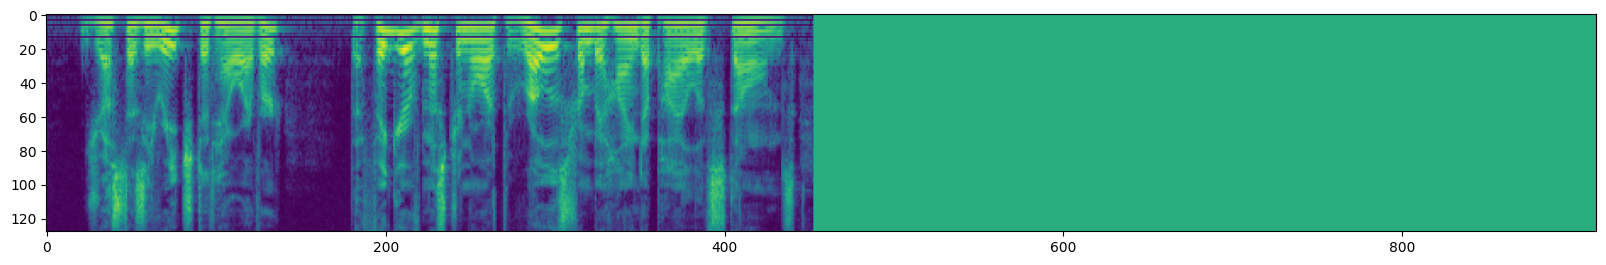

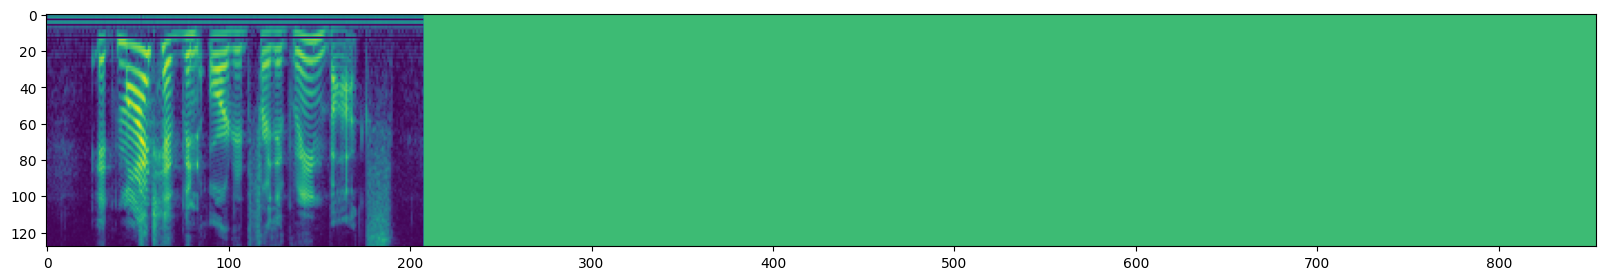

In [2]:
from train import main


main(config)

## Импорт результатов запуска

Чтобы подключиться к хранилищу на Google-диске через GDriveStorage, необходимо авторизоваться в аккаунт, имеющий право на чтение из этой директории. Далее будет рассмотрена авторизация с помощью credentials сервисного аккаунта.

**Note**: Эти credentials дают право только на чтение (файлов с открытым общим доступом), поэтому экспортировать что-либо с их помощью не получится (так же, как и прочитать непошаренные файлы с моего диска)

Мы прервали обучение сразу после 2-й эпохи. Попробуем возобновить его, удалив все локальные файлы от запуска.

In [18]:
!rm -r saved/models/test_config/1026_001143

1. Загрузим json с credentials по [ссылке](1hxxlsN3rYQO8-qH-ZNBt5J-UhhM4a0FD)

In [4]:
!wget 'https://drive.google.com/u/1/uc?id=1hxxlsN3rYQO8-qH-ZNBt5J-UhhM4a0FD&export=download' \
  --output-document 'gdrive_models_storage_key.json'

--2023-10-26 00:30:24--  https://drive.google.com/u/1/uc?id=1hxxlsN3rYQO8-qH-ZNBt5J-UhhM4a0FD&export=download
Resolving drive.google.com (drive.google.com)... 64.233.164.194, 2a00:1450:4010:c1c::c2
Connecting to drive.google.com (drive.google.com)|64.233.164.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1hxxlsN3rYQO8-qH-ZNBt5J-UhhM4a0FD&export=download [following]
--2023-10-26 00:30:24--  https://drive.google.com/uc?id=1hxxlsN3rYQO8-qH-ZNBt5J-UhhM4a0FD&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qqcun4vqj7ohmkt4ijiqkhp40j61qev1/1698269400000/04796695416015180161/*/1hxxlsN3rYQO8-qH-ZNBt5J-UhhM4a0FD?e=download&uuid=6a7dccbc-fe4f-41ea-9be6-c6329e3ce72d [following]
--2023-10-26 00:30:25--  https://doc-0g-ak-docs.googleusercontent.com/docs/secure

2. Авторизуемся (потребуется установить библиотеки из `storage/requirements.txt`)

In [5]:
from oauth2client.service_account import ServiceAccountCredentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive


credentials = ServiceAccountCredentials.from_json_keyfile_name(
    "./gdrive_models_storage_key.json",
    scopes = ['https://www.googleapis.com/auth/drive.readonly'],
)
gauth = GoogleAuth()
gauth.credentials = credentials

3. Создадим внешнее хранилище

In [13]:
from hw_asr.storage.gdrive_storage import GDriveStorage


gdrive_storage = GDriveStorage(storage_dir_id='1XmURU5KBdxDcP_zFHbe06FSThHYqVy_S',  # ID директории на Google Диске
                               gauth=gauth)

In [14]:
print(gdrive_storage.list_content())

{
    "test_config": {
        "1026_001143": {
            "checkpoints": [
                "checkpoint-epoch2",
                "checkpoint-epoch1"
            ],
            "with_config": true
        }
    },
    "one_batch_deepspeech2": {
        "1020_191809": {
            "checkpoints": [
                "checkpoint"
            ],
            "with_config": true
        }
    },
    "asr_models_importer_service_account.json": {}
}


4. Получим локальное хранилище с данными об интуресующем нас запуске

In [19]:
from hw_asr.storage.experiments_storage import ExperimentsStorage


run_storage = ExperimentsStorage('./saved/models').get_run('test_config', '1026_001143', create_run_if_no=True)

5. Импортируем конфиг и чекпоинт 2-й эпохи

In [20]:
gdrive_storage.import_config(run_storage)
gdrive_storage.import_checkpoint(run_storage, 'checkpoint-epoch2')

Successfully downloaded file config.json for run test_config:1026_001143
Config for run test_config:1026_001143 imported
Successfully downloaded file checkpoint-epoch2.pth for run test_config:1026_001143
Checkpoint <hw_asr.storage.experiments_storage.RunStorage object at 0x146e9fbe0> for run test_config:1026_001143 imported


Попробуем теперь запустить обучение

In [23]:
import json

from hw_asr.utils.parse_config import ConfigParser


# используем специальный конфиг, в котором указано, что мы хотим использовать GDriveStorage
json_config = json.load(open('./hw_asr/tests/gdrive_config.json', 'r'))
config = ConfigParser(json_config, resume=run_storage.get_checkpoints_filepaths()['checkpoint-epoch2'])

Visit the url:
https://accounts.google.com/o/oauth2/auth?client_id=384601583398-6j87pe9e89u5pmf5a8fkj46pebsosv92.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code
Enter the code4/0AfJohXlET7o57QXg8l6ctui0Ss3Wr5vxsmQBWe9uTF5upb-RPqjTcvDboGw8JVi-tZKvjA
Successfully retrieved access token
Authentication successful.
file_cache is only supported with oauth2client<4.0.0
Saving config for run test_config:1026_004651
Config for run test_config:1026_004651 exported


61 (2.3%) records are longer then 20.0 seconds. Excluding them.
292 (10.8%) records are longer then 200 characters. Excluding them.
Filtered 292(10.8%) records  from dataset
BaselineModel(
  (net): Sequential(
    (0): Linear(in_features=128, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=28, bias=True)
  )
)
Trainable parameters: 343068


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


CER (argmax)_train,█▁
WER (argmax)_train,▁▁
epoch_,▁
epoch_train,▁
grad norm_train,█▁
learning rate_train,▁█
loss_train,█▁
steps_per_sec_train,▁
CER (argmax)_train,0.98634
WER (argmax)_train,1.0
epoch_,1


Loading checkpoint: saved/models/test_config/1026_001143/checkpoint-epoch2.pth ...
Checkpoint loaded. Resume training from epoch 3


train:   0%|                                             | 0/10 [00:00<?, ?it/s]

Train Epoch: 3 [0/10 (0%)] Loss: 6.626209


train: 100%|████████████████████████████████████| 10/10 [00:14<00:00,  1.46s/it]

    epoch          : 3
    loss           : 6.626209259033203
    grad norm      : 9.99999713897705
    WER (argmax)   : 1.0
    CER (argmax)   : 0.9823503952097605
Saving checkpoint checkpoint-epoch3 for run test_config:1026_004651



train:   0%|                                             | 0/10 [00:00<?, ?it/s]

Train Epoch: 4 [0/10 (0%)] Loss: 5.674088


train: 100%|████████████████████████████████████| 10/10 [00:14<00:00,  1.43s/it]

    epoch          : 4
    loss           : 5.674088478088379
    grad norm      : 9.999998092651367
    WER (argmax)   : 0.9983870967741936
    CER (argmax)   : 0.9883229399528493
Saving checkpoint checkpoint-epoch4 for run test_config:1026_004651



train:   0%|                                             | 0/10 [00:00<?, ?it/s]

Train Epoch: 5 [0/10 (0%)] Loss: 6.186782


train:   0%|                                             | 0/10 [00:02<?, ?it/s]

Saving model on keyboard interrupt
Saving checkpoint checkpoint-epoch5 for run test_config:1026_004651


KeyboardInterrupt: 

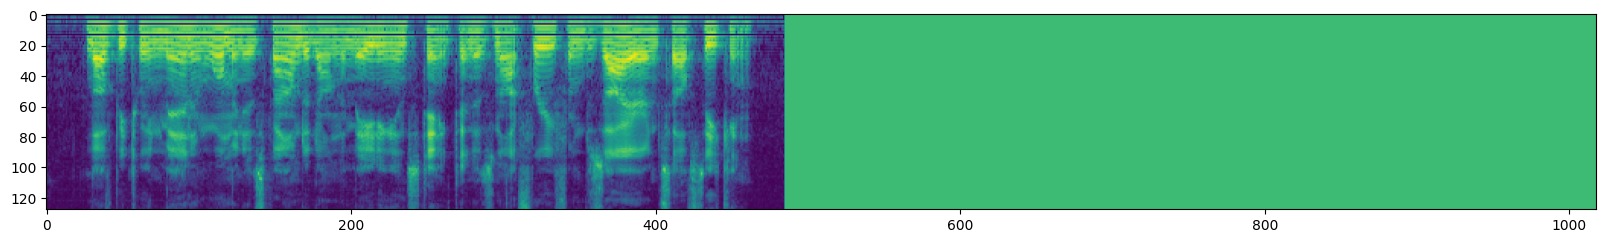

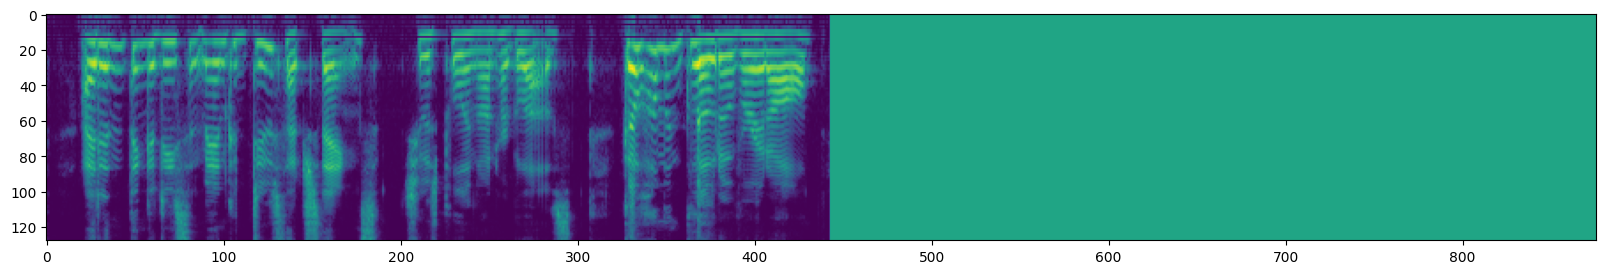

In [24]:
from train import main


main(config)

Можно видеть, что обучение успешно продолжилось с 3-ей эпохи

In [26]:
with open('./requirements.txt', 'r') as file:
    lines = [line.strip() for line in file.readlines()]
    print(' '.join(lines))

torch==1.11.0 torchvision==0.12.0 numpy==1.23.5 tqdm==4.64.1 tensorboard matplotlib==3.6.0 pandas==1.5.1  speechbrain~=0.5.12 datasets==2.9.0 torch_audiomentations==0.11.0 editdistance==0.6.2 wandb==0.13.5 pyctcdecode torchaudio~=0.11.0 pillow==9.3.0


wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wand

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wand